# MedGAN Training with 5-Fold Cross Validation

## Imports

In [1]:
from medgan_model import Medgan
from data_loader import load_shuttle_data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import KFold

In [2]:
from medgan_model import Medgan
from data_loader import load_shuttle_data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold

## Load and Preprocess Data

In [3]:
# --- Load and preprocess real shuttle data ---
df = pd.read_csv("datasets/shuttle.csv", header=None)
X_real = df.iloc[:, :-1]
y_real = df.iloc[:, -1]

In [4]:
# --- Load data without labels for GAN training ---
X_train, X_test = load_shuttle_data("datasets/shuttle.csv", test_size=0.2, normalize=True, n_shuffle=10)
input_dim = X_train.shape[1]

In [5]:
# --- Load Data ---
X_train, X_test = load_shuttle_data("datasets/shuttle.csv", test_size=0.2, normalize=True, n_shuffle=10)
input_dim = X_train.shape[1]

## Initialize and Train MedGAN

In [6]:

# --- Apply 5-Fold Cross Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n===== Fold {fold+1} of 5 =====")
    
    # Prepare train and validation split
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    
    # Now use X_tr for training instead of X_train



===== Fold 1 of 5 =====

===== Fold 2 of 5 =====

===== Fold 3 of 5 =====

===== Fold 4 of 5 =====

===== Fold 5 of 5 =====


In [7]:
# --- Initialize and Train MedGAN ---
medgan = Medgan(input_dim=input_dim, ae_loss_type='bce')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
batch_size = 64
n_epochs = 100

for epoch in range(n_epochs):
    np.random.shuffle(X_tr)
    for i in range(0, len(X_tr), batch_size):
        batch = X_tr[i:i + batch_size]
        noise = np.random.normal(size=(batch.shape[0], medgan.random_dim))
        medgan.train_step(batch, noise)
    print(f"Epoch {epoch+1}/{n_epochs} completed")

Epoch 1/100 completed
Epoch 2/100 completed
Epoch 3/100 completed
Epoch 4/100 completed
Epoch 5/100 completed
Epoch 6/100 completed
Epoch 7/100 completed
Epoch 8/100 completed
Epoch 9/100 completed
Epoch 10/100 completed
Epoch 11/100 completed
Epoch 12/100 completed
Epoch 13/100 completed
Epoch 14/100 completed
Epoch 15/100 completed
Epoch 16/100 completed
Epoch 17/100 completed
Epoch 18/100 completed
Epoch 19/100 completed
Epoch 20/100 completed
Epoch 21/100 completed
Epoch 22/100 completed
Epoch 23/100 completed
Epoch 24/100 completed
Epoch 25/100 completed
Epoch 26/100 completed
Epoch 27/100 completed
Epoch 28/100 completed
Epoch 29/100 completed
Epoch 30/100 completed
Epoch 31/100 completed
Epoch 32/100 completed
Epoch 33/100 completed
Epoch 34/100 completed
Epoch 35/100 completed
Epoch 36/100 completed
Epoch 37/100 completed
Epoch 38/100 completed
Epoch 39/100 completed
Epoch 40/100 completed
Epoch 41/100 completed
Epoch 42/100 completed
Epoch 43/100 completed
Epoch 44/100 complet

In [8]:
medgan = Medgan(input_dim=input_dim, ae_loss_type='bce')


In [9]:
# --- Initialize and Compile Model ---
medgan = Medgan(input_dim=input_dim, ae_loss_type='bce')  # or 'mse' for real-valued
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

In [10]:

# --- Apply 5-Fold Cross Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n===== Fold {fold+1} of 5 =====")
    
    # Prepare train and validation split
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    
    # Now use X_tr for training instead of X_train



===== Fold 1 of 5 =====

===== Fold 2 of 5 =====

===== Fold 3 of 5 =====

===== Fold 4 of 5 =====

===== Fold 5 of 5 =====


In [11]:
# --- Training Loop ---
ae_losses, d_losses, g_losses = [], [], []

for epoch in range(n_epochs):
    np.random.shuffle(X_tr)
    for i in range(0, len(X_tr), batch_size):
        batch = X_tr[i:i + batch_size]
        noise = np.random.normal(size=(batch.shape[0], medgan.random_dim))
        ae_loss, d_loss, g_loss = medgan.train_step(batch, noise)

    ae_losses.append(ae_loss.numpy())
    d_losses.append(d_loss.numpy())
    g_losses.append(g_loss.numpy())

    print(f"Epoch {epoch + 1}/{n_epochs} | AE: {ae_loss:.4f}, D: {d_loss:.4f}, G: {g_loss:.4f}")

Epoch 1/100 | AE: 0.6885, D: 1.3820, G: 0.6485
Epoch 2/100 | AE: 0.6889, D: 1.3815, G: 0.6466
Epoch 3/100 | AE: 0.6888, D: 1.3875, G: 0.6423
Epoch 4/100 | AE: 0.6885, D: 1.3831, G: 0.6484
Epoch 5/100 | AE: 0.6888, D: 1.3841, G: 0.6458
Epoch 6/100 | AE: 0.6891, D: 1.3809, G: 0.6473
Epoch 7/100 | AE: 0.6884, D: 1.3832, G: 0.6476
Epoch 8/100 | AE: 0.6891, D: 1.3812, G: 0.6478
Epoch 9/100 | AE: 0.6888, D: 1.3848, G: 0.6451
Epoch 10/100 | AE: 0.6885, D: 1.3833, G: 0.6479
Epoch 11/100 | AE: 0.6888, D: 1.3823, G: 0.6480
Epoch 12/100 | AE: 0.6887, D: 1.3832, G: 0.6467
Epoch 13/100 | AE: 0.6885, D: 1.3821, G: 0.6482
Epoch 14/100 | AE: 0.6886, D: 1.3847, G: 0.6456
Epoch 15/100 | AE: 0.6884, D: 1.3849, G: 0.6466
Epoch 16/100 | AE: 0.6883, D: 1.3828, G: 0.6485
Epoch 17/100 | AE: 0.6884, D: 1.3815, G: 0.6492
Epoch 18/100 | AE: 0.6887, D: 1.3838, G: 0.6468
Epoch 19/100 | AE: 0.6885, D: 1.3847, G: 0.6467
Epoch 20/100 | AE: 0.6885, D: 1.3837, G: 0.6479
Epoch 21/100 | AE: 0.6885, D: 1.3839, G: 0.6474
E

## Generate Synthetic Data

In [12]:

# --- Define X_train_real and related preprocessing variables ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("datasets/shuttle.csv", header=None)
X_real = df.iloc[:, :-1]
y_real = df.iloc[:, -1]

le = LabelEncoder()
y_encoded = le.fit_transform(y_real)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_real)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

from sklearn.model_selection import KFold

In [13]:
# --- Generate Synthetic Data ---
synthetic_data = medgan.generate_data(num_samples=len(X_train_real))
synthetic_data_scaled = scaler.transform(synthetic_data)  # Scale similarly

In [14]:
# --- Generate Synthetic Data ---
synthetic_data = medgan.generate_data(num_samples=1000)
print("Generated Data Shape:", synthetic_data.shape)


Generated Data Shape: (1000, 9)


In [15]:
# --- Generate Synthetic Data ---
synthetic_data = medgan.generate_data(num_samples=1000)
print("Generated Data Shape:", synthetic_data.shape)


Generated Data Shape: (1000, 9)


## Classifier Evaluation

In [16]:
# Encode target for XGBClassifier
le = LabelEncoder()
y_encoded = le.fit_transform(y_real)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_real)

# Train-test split
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [17]:
# --- Classifier Evaluation ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(max_iter=300, random_state=42),
    "XGB Classifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=300, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_real, y_train_real)
    y_pred = model.predict(X_test_real)
    results[name] = {
        "Accuracy": accuracy_score(y_test_real, y_pred),
        "Precision": precision_score(y_test_real, y_pred, average='macro', zero_division=0),
        "Recall": recall_score(y_test_real, y_pred, average='macro', zero_division=0),
        "F1 Score": f1_score(y_test_real, y_pred, average='macro', zero_division=0)
    }

results_df = pd.DataFrame(results).T
print("\nClassifier Evaluation on Real Data:")
print(results_df)

C:\Anaconda\envs\medgan_env\lib\site-packages\xgboost\core.py:158: UserWarning: [21:26:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classifier Evaluation on Real Data:
                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.998966   0.799522  0.791260  0.790563
MLP Classifier       0.998966   0.790566  0.750000  0.767305
XGB Classifier       0.999655   0.999928  0.999593  0.999761
Logistic Regression  0.968621   0.480788  0.476037  0.478302


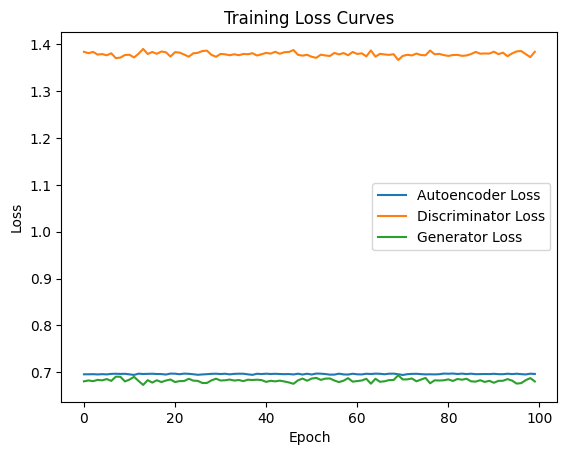

In [22]:
# --- Plot Losses ---
plt.plot(ae_losses, label='Autoencoder Loss')
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Curves")
plt.show()

In [ ]:
# Optional: Save for later use
np.save("generated_samples.npy", synthetic_data)